Importación de Librerías:

In [2]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importación de la base de datos Fashion_Mnist:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

Carga de data y ajuste de variables para trabajar con los datos de Fashion_Mnist:

In [13]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)
print(test_images.shape)
x_train=train_images.reshape(60000,784)
x_test = test_images.reshape(10000, 784)
y_train = train_labels
y_test = test_labels

(60000, 28, 28)
(10000, 28, 28)


Aplicamos la Regresión Logística:

In [9]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print("Score")
print(score)

Score
0.8412


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Matriz de confusión:

In [10]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[812   5  16  46   9   0  98   0  14   0]
 [  2 960   1  27   4   0   4   0   2   0]
 [ 18   6 737  11 140   1  78   0   9   0]
 [ 25  15  15 858  44   1  37   0   5   0]
 [  0   3 106  33 779   1  70   0   8   0]
 [  1   1   0   0   0 891   0  56   9  42]
 [139   3 129  42 114   0 550   0  23   0]
 [  0   0   0   0   0  36   0 933   0  31]
 [  3   1   7  10   2   3  21   5 947   1]
 [  0   0   0   0   0  13   0  39   3 945]]


Matriz de confusión detallada:

Text(0.5, 1.0, 'Accuracy Score: 0.8412')

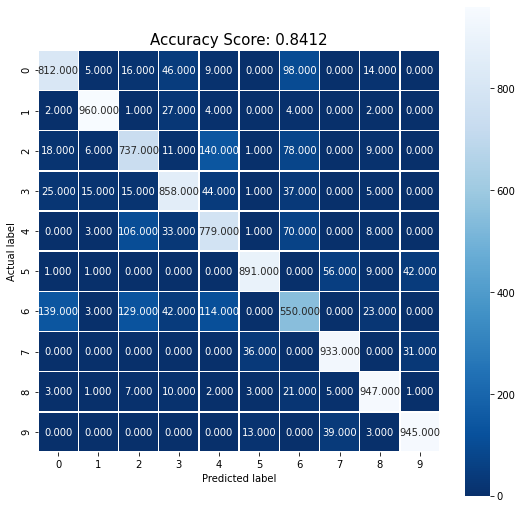

In [11]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

Imágenes de Fashion_Mnist con sus etiquetas respectivas:

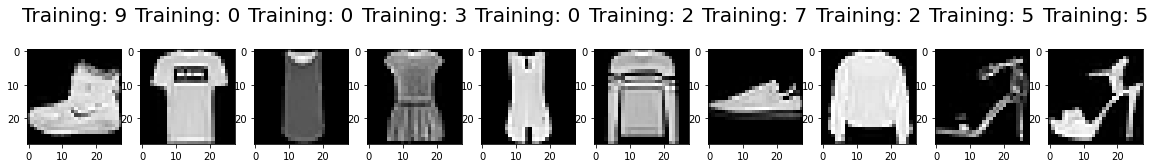

In [12]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_images[0:10], train_labels[0:10])):
  plt.subplot(1, 10, index + 1)
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)